In [1]:
import bluequbit
from qiskit import QuantumCircuit
from collections import Counter  # en haut du fichier

API_KEY = "4kDE91xNSXezFZQyZc0w7w1C4owXRl1f"
QASM_FILENAME = "bluequbit/answer/P1_little_peak.qasm"
DEVICE = 'mps.cpu'
SHOTS = 1000


## MEASURE ON Z
print(f"Chargement du circuit depuis le fichier : {QASM_FILENAME}")
qc_qiskit = QuantumCircuit.from_qasm_file(QASM_FILENAME)
qc_qiskit.measure_all()

print(qc_qiskit.draw(output='text'))

bq = bluequbit.init(API_KEY)

print(f"Exécution du circuit sur le backend '{DEVICE}' avec {SHOTS} shots...")
result = bq.run(qc_qiskit, device=DEVICE, shots=SHOTS) 

print("\nRésultats (Comptes) :")
counts = result.get_counts()
print(sorted(counts.items(), key=lambda item: item[1], reverse=True))

[BQ-PYTHON-SDK][WARNING] - Beta version 0.12.0b1 of BlueQubit Python SDK is being used.


Chargement du circuit depuis le fichier : bluequbit/answer/P1_little_peak.qasm
        ┌──────────┐             ░ ┌─┐         
   q_0: ┤ Ry(4π/5) ├─────────────░─┤M├─────────
        └──┬───┬───┘┌──────────┐ ░ └╥┘┌─┐      
   q_1: ───┤ X ├────┤ Ry(4π/5) ├─░──╫─┤M├──────
           ├───┤    ├──────────┤ ░  ║ └╥┘┌─┐   
   q_2: ───┤ X ├────┤ Ry(4π/5) ├─░──╫──╫─┤M├───
        ┌──┴───┴───┐└──────────┘ ░  ║  ║ └╥┘┌─┐
   q_3: ┤ Ry(4π/5) ├─────────────░──╫──╫──╫─┤M├
        └──────────┘             ░  ║  ║  ║ └╥┘
meas: 4/════════════════════════════╩══╩══╩══╩═
                                    0  1  2  3 
Exécution du circuit sur le backend 'mps.cpu' avec 1000 shots...
[BQ-PYTHON-SDK][INFO] - Submitted: Job ID: 5E658B38B61yc53S, device: mps.cpu, run status: RUNNING, created on: 2025-04-13 11:38:46 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 4

Résultats (Comptes) :
[('1001', 653), ('0001', 81), ('1101', 76), ('1000', 75), ('1011', 67), ('0000', 10), ('1100', 9), ('0101

In [4]:

### MEASURE ON X
print(f"Chargement du circuit depuis le fichier : {QASM_FILENAME}")
qc_qiskit = QuantumCircuit.from_qasm_file(QASM_FILENAME)

# Appliquer Hadamard sur tous les qubits avant mesure (pour mesurer en base X)
for qubit in range(qc_qiskit.num_qubits):
    qc_qiskit.h(qubit)

qc_qiskit.measure_all()

print(qc_qiskit.draw(output='text'))

# Initialisation et exécution
bq = bluequbit.init(API_KEY)
print(f"Exécution du circuit sur le backend '{DEVICE}' avec {SHOTS} shots...")
result = bq.run(qc_qiskit, device=DEVICE, shots=SHOTS)

# Résultats
print("\nRésultats (Comptes) :")
counts = result.get_counts()
data = sorted(counts.items(), key=lambda item: item[1], reverse=True)
print(data)

[BQ-PYTHON-SDK][WARNING] - Beta version 0.12.0b1 of BlueQubit Python SDK is being used.


Chargement du circuit depuis le fichier : bluequbit/answer/P1_little_peak.qasm
        ┌──────────┐   ┌───┐          ░ ┌─┐         
   q_0: ┤ Ry(4π/5) ├───┤ H ├──────────░─┤M├─────────
        └──┬───┬───┘┌──┴───┴───┐┌───┐ ░ └╥┘┌─┐      
   q_1: ───┤ X ├────┤ Ry(4π/5) ├┤ H ├─░──╫─┤M├──────
           ├───┤    ├──────────┤├───┤ ░  ║ └╥┘┌─┐   
   q_2: ───┤ X ├────┤ Ry(4π/5) ├┤ H ├─░──╫──╫─┤M├───
        ┌──┴───┴───┐└──┬───┬───┘└───┘ ░  ║  ║ └╥┘┌─┐
   q_3: ┤ Ry(4π/5) ├───┤ H ├──────────░──╫──╫──╫─┤M├
        └──────────┘   └───┘          ░  ║  ║  ║ └╥┘
meas: 4/═════════════════════════════════╩══╩══╩══╩═
                                         0  1  2  3 
Exécution du circuit sur le backend 'mps.cpu' avec 1000 shots...
[BQ-PYTHON-SDK][INFO] - Submitted: Job ID: sn9jrUgl1ncvQ17d, device: mps.cpu, run status: RUNNING, created on: 2025-04-13 11:40:33 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 4

Résultats (Comptes) :
[('0110', 402), ('0100', 115), ('0010', 103), ('01

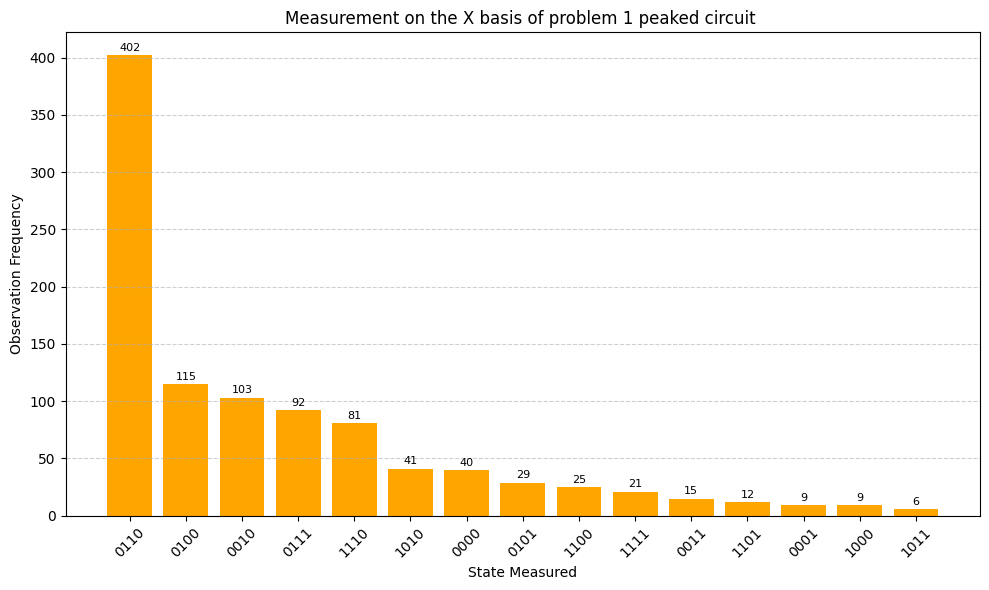

In [10]:
import matplotlib.pyplot as plt

labels, counts = zip(*data)

# Create the plot
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, counts, color='orange')
plt.xlabel("State Measured")
plt.ylabel("Observation Frequency")
plt.title("Measurement on the X basis of problem 1 peaked circuit ")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Show values on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2, f'{int(yval)}', 
             ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


In [11]:
### MEASURE ON Y
print(f"Chargement du circuit depuis le fichier : {QASM_FILENAME}")
qc_qiskit = QuantumCircuit.from_qasm_file(QASM_FILENAME)

# Appliquer S† puis H sur chaque qubit pour mesurer en base Y
for qubit in range(qc_qiskit.num_qubits):
    qc_qiskit.sdg(qubit)  # S†
    qc_qiskit.h(qubit)    # Hadamard

qc_qiskit.measure_all()

print(qc_qiskit.draw(output='text'))

# Initialisation et exécution
bq = bluequbit.init(API_KEY)
print(f"Exécution du circuit sur le backend '{DEVICE}' avec {SHOTS} shots...")
result = bq.run(qc_qiskit, device=DEVICE, shots=SHOTS)

# Résultats
print("\nRésultats (Comptes) :")
counts = result.get_counts()
data = sorted(counts.items(), key=lambda item: item[1], reverse=True)
print(data)

[BQ-PYTHON-SDK][WARNING] - Beta version 0.12.0b1 of BlueQubit Python SDK is being used.


Chargement du circuit depuis le fichier : bluequbit/answer/P1_little_peak.qasm
        ┌──────────┐  ┌─────┐    ┌───┐       ░ ┌─┐         
   q_0: ┤ Ry(4π/5) ├──┤ Sdg ├────┤ H ├───────░─┤M├─────────
        └──┬───┬───┘┌─┴─────┴──┐┌┴───┴┐┌───┐ ░ └╥┘┌─┐      
   q_1: ───┤ X ├────┤ Ry(4π/5) ├┤ Sdg ├┤ H ├─░──╫─┤M├──────
           ├───┤    ├──────────┤├─────┤├───┤ ░  ║ └╥┘┌─┐   
   q_2: ───┤ X ├────┤ Ry(4π/5) ├┤ Sdg ├┤ H ├─░──╫──╫─┤M├───
        ┌──┴───┴───┐└─┬─────┬──┘└┬───┬┘└───┘ ░  ║  ║ └╥┘┌─┐
   q_3: ┤ Ry(4π/5) ├──┤ Sdg ├────┤ H ├───────░──╫──╫──╫─┤M├
        └──────────┘  └─────┘    └───┘       ░  ║  ║  ║ └╥┘
meas: 4/════════════════════════════════════════╩══╩══╩══╩═
                                                0  1  2  3 
Exécution du circuit sur le backend 'mps.cpu' avec 1000 shots...
[BQ-PYTHON-SDK][INFO] - Submitted: Job ID: t6bS9RDNygl4lVgR, device: mps.cpu, run status: RUNNING, created on: 2025-04-13 11:45:35 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits

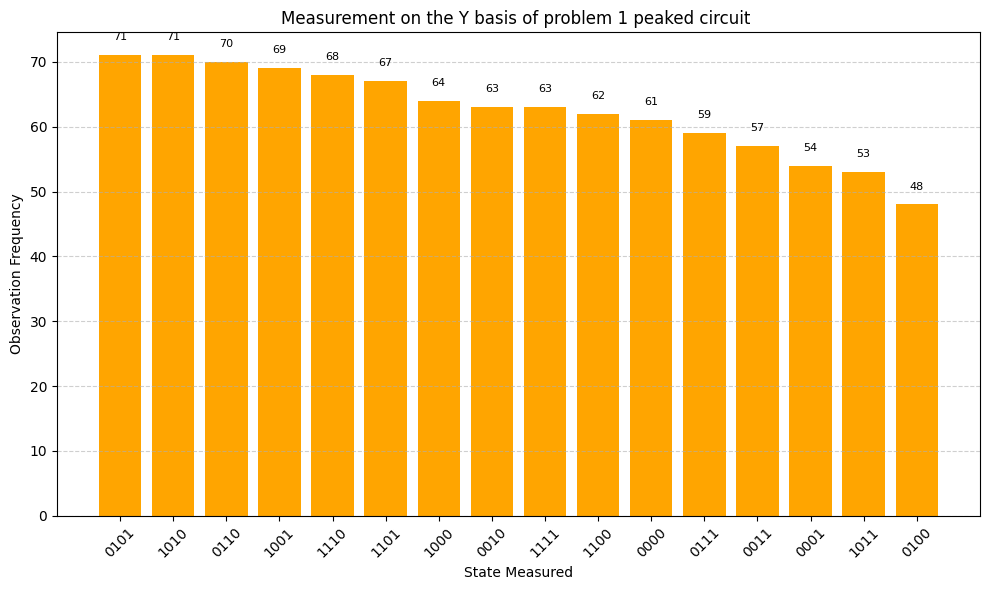

In [ ]:
import matplotlib.pyplot as plt

labels, counts = zip(*data)

# Create the plot
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, counts, color='orange')
plt.xlabel("State Measured")
plt.ylabel("Observation Frequency")
plt.title("Measurement on the Y basis of problem 1 peaked circuit ")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Show values on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2, f'{int(yval)}', 
             ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()
